In [90]:
import pandas as pd
import yfinance as yf
import numpy as np

In [91]:
import requests
from bs4 import BeautifulSoup

# HTTP GET request to the Wikipedia page
url = 'https://en.wikipedia.org/wiki/Nasdaq-100'
response = requests.get(url)

# Parsing the HTML content of the page 
soup = BeautifulSoup(response.content, 'html.parser')

# Finding all the tables on the page
tables = soup.find_all('table')

# Extracting the fifth table 
index_table = tables[4]

ticker_df = pd.read_html(str(index_table))[0]

In [92]:
tickers = ticker_df['Ticker'].to_list()

In [93]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%%**********************]  101 of 101 completed


In [ ]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%%**********************]  101 of 101 completed


In [94]:
df = df.dropna(axis=1)
mtl = (df.pct_change() + 1)[1:].resample('M').prod()

In [95]:
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)


In [96]:
ret_12, ret_6, ret_3 = get_rolling_ret(mtl,12), get_rolling_ret(mtl,6), get_rolling_ret(mtl,3)

In [97]:
top_50 = ret_12.loc['2010-12-31'].nlargest(50).index

top_30 = ret_6.loc['2010-12-31', top_50].nlargest(30).index

top_10 = ret_3.loc['2010-12-31', top_30].nlargest(10).index
top_10

Index(['LULU', 'ON', 'SIRI', 'BKR', 'FTNT', 'ASML', 'ILMN', 'AVGO', 'SBUX',
       'ODFL'],
      dtype='object')

In [98]:
def get_top(date):
    top_50 = ret_12.loc[date].nlargest(50).index
    top_30 = ret_6.loc[date, top_50].nlargest(30).index
    top_10 = ret_3.loc[date, top_30].nlargest(10).index
    return top_10

In [99]:
get_top('2010-12-31')

Index(['LULU', 'ON', 'SIRI', 'BKR', 'FTNT', 'ASML', 'ILMN', 'AVGO', 'SBUX',
       'ODFL'],
      dtype='object')

In [100]:
portfolio = mtl.loc['2010-12-31':,get_top('2010-12-31')][1:2]
portfolio.mean(axis=1).values[0]

1.069096677343574

In [101]:
def pf_performance(date):
    portfolio = mtl.loc[date:,get_top(date)][1:2]
    return portfolio.mean(axis=1).values[0]

In [102]:
mtl.index[:-1]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', name='Date', length=164, freq='M')

In [103]:
returns = []

for date in mtl.index[:-1]:
    returns.append(pf_performance(date))

<Axes: xlabel='Date'>

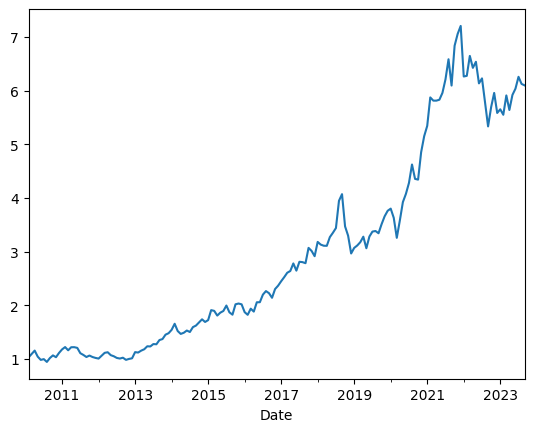

In [104]:
pd.Series([i - 0.01 for i in returns],index=mtl.index[1:]).cumprod().plot()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

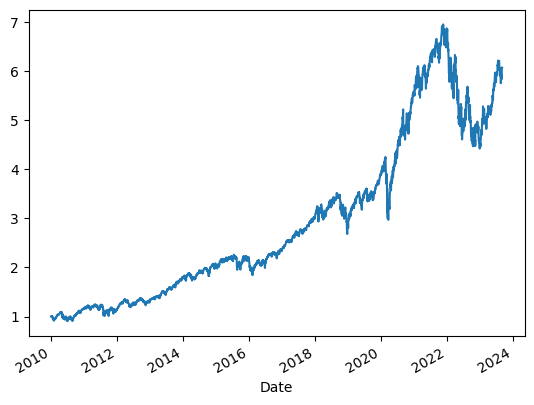

In [105]:
nas_df = yf.download('^IXIC', start='2010-01-01')
(nas_df['Adj Close'].pct_change() + 1).cumprod().plot()

In [106]:
pd.Series([i - 0.01 for i in returns],index=mtl.index[1:]).cumprod()

Date
2010-02-28    1.030044
2010-03-31    1.092584
2010-04-30    1.155929
2010-05-31    1.042940
2010-06-30    0.982879
                ...   
2023-05-31    5.918827
2023-06-30    6.036729
2023-07-31    6.257230
2023-08-31    6.125094
2023-09-30    6.098194
Freq: M, Length: 164, dtype: float64

In [107]:
(nas_df['Adj Close'].pct_change() + 1).cumprod()

Date
2010-01-04         NaN
2010-01-05    1.000126
2010-01-06    0.996825
2010-01-07    0.996374
2010-01-08    1.003790
                ...   
2023-08-28    5.937018
2023-08-29    6.040391
2023-08-30    6.073119
2023-08-31    6.079903
2023-09-01    6.078534
Name: Adj Close, Length: 3440, dtype: float64